In [49]:
!pip install sympy
!pip install matplotlib

import sympy as sym
import random
#from random import normalvariate

def column(matrix, i):
    return [row[i] for row in matrix]

def func_gen(func, step_partition = 100, left = 5, right = 25, rand_shift = 1, seed = None):

    result,original_points = [], []

    if (seed is not None):
        random.seed = seed

   
    
    dfunc = func.diff(x)
    f = sym.lambdify((x),func)
    df = sym.lambdify((x),dfunc)



    step = abs(right-left)/step_partition

    cur_val = left
    while (cur_val < right):

        func_rand_shift = abs(rand_shift*df(cur_val))
        #тут надо подумать над дисперсией......................
        

        y = f(cur_val)

        rand_val_y = random.normalvariate(y,func_rand_shift/3)

        result.append((cur_val,rand_val_y))
        original_points.append((cur_val,y))


        new_step = step/abs(df(cur_val))

        if (new_step > 2*step):
            cur_val += 2*step
        elif (new_step < 0.1*step):
            cur_val += 0.1*step
        else:
            cur_val += new_step

        
    
    return result, original_points


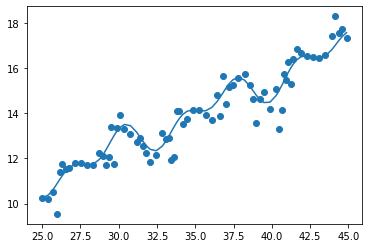

74


In [95]:
x = sym.symbols('x')
a = 1.3
b = 0.3
c = 3.5
d = 0.4
k = 0.4


step_partition = 100

left, right = 25,45

func = sym.sin(a*x)*sym.cos(d*x)+(b*x+c)
#func = sym.sin(a*x)*sym.cos(d*x)*sym.sqrt(abs(k*x))+(b*x+c)
#func = sym.sin(x)

points, original_points = func_gen(func,step_partition,left,right,2)


import matplotlib.pyplot as plt

plt.scatter(column(points,0), column(points,1))
plt.plot(column(original_points,0), column(original_points,1))
plt.show()

print(len(points))

In [93]:
import numpy as np
def dist(X, Xi):
    return np.sqrt((X[0]-Xi[0])**2 + (X[1]-Xi[1])**2)


def K(r):
    return P(r)


#гауссово ядро
def G(r):
    return np.exp(-2*r**2)

#прямоугольное ядро
def P(r):
    return int(r <= 1)

#регрессия
def appr(h,points):
    result = []
    for i in points:
        #считаем по формуле ядерного сглаживания
        num = 0
        denum = 0
        for j in points:
            num += j[1]*K(dist(i, j)/h)
            denum +=K(dist(i, j)/h)

        a_h = num/denum

        result.append((i[0],a_h))
    return result



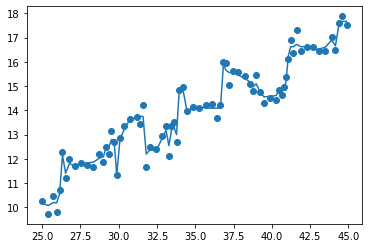

74


In [94]:
#ширина окошка
h = 1


appr_f = appr(h,points)


import matplotlib.pyplot as plt

plt.scatter(column(points,0), column(points,1))
plt.plot(column(appr_f,0), column(appr_f,1))
plt.show()

print(len(points))